In [ ]:
# Authors Rygiel Corpuz and Shawn Custodio

# Importing Libraries/Packages


In [ ]:
import os
os.chdir("/usr")

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -P /usr
!tar -xzf ta-lib-0.4.0-src.tar.gz

--2023-12-03 07:42:42--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 07:42:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 07:42:43--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
import os
os.chdir('/usr/ta-lib')

In [ ]:
!./configure --prefix=/usr
!make
!sudo make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017539 sha256=f5ebc9e7426472487ecdd83ef791c4c6028c4f27517534d4d6380bad6a0ef5d7
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


In [ ]:
!pip install mplchart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 909.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplchart: filename=mplchart-0.0.3-py3-none-any.whl size=28412 sha256=966b4e46e164ab525defecd4eabcc1e71edcf14aed6659fd06c7b1a3c8749eb1
  Stored in directory: /root/.cache/pip/wheels/d3/95/3b/ba714aea99563a171a94e623569c8062f06674025ec5adaef2
Successfully built mplchart


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import talib as ta
from datetime import datetime
import numpy as np
import plotly.graph_objects as go
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import ROC, SMA, EMA, RSI, MACD

# Defining Parameters


In [ ]:
# Define the simulation parameters
initial_investment = 1000
test_period_years = 30
monthly_investment = 1000

# Downloading Data from Yahoo Finance


In [ ]:
# Download historical data for the asset
ticker = "FLL"
df = yf.Ticker(ticker).history(period="30y")
prices = yf.Ticker(ticker).history('30y')

# Exploring Data

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-12-02 00:00:00-05:00,1.8125,1.81250,1.5625,1.62500,60500,0.0,0.0
1993-12-03 00:00:00-05:00,1.8125,2.00000,1.6250,1.78125,174700,0.0,0.0
1993-12-06 00:00:00-05:00,1.8125,1.96875,1.8125,1.87500,29600,0.0,0.0
1993-12-07 00:00:00-05:00,1.8125,1.93750,1.8125,1.81250,23800,0.0,0.0
1993-12-08 00:00:00-05:00,1.8125,1.87500,1.7500,1.81250,54900,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-27 00:00:00-05:00,5.2700,5.40000,5.1500,5.23000,132500,0.0,0.0
2023-11-28 00:00:00-05:00,5.2400,5.25000,5.0100,5.14000,111600,0.0,0.0
2023-11-29 00:00:00-05:00,5.1600,5.28000,5.0400,5.07000,62100,0.0,0.0


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

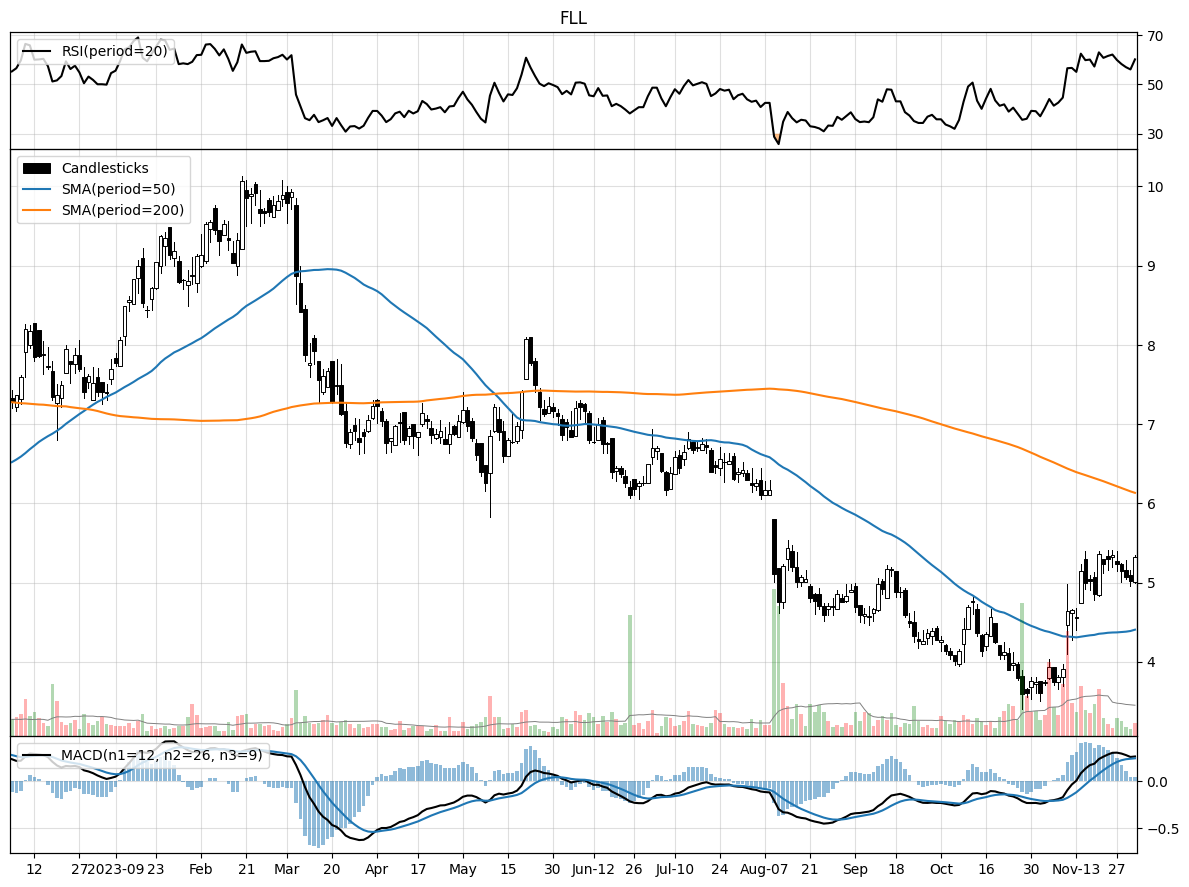

In [ ]:
max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200), Volume(),
    RSI(),
    MACD(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

# Implementing Investment Strategies

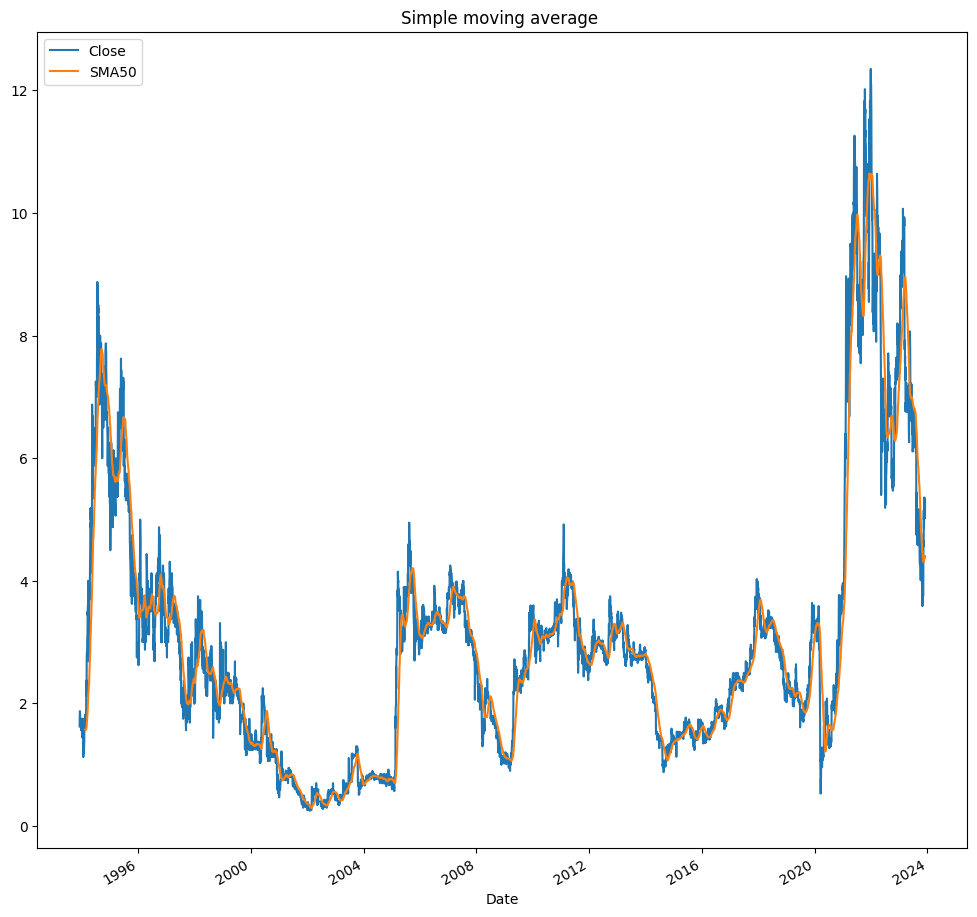

In [ ]:
df['SMA50'] = ta.SMA(df['Close'],50)
df[['Close', 'SMA50']].plot(figsize=(12,12))
plt.title("Simple moving average ")
plt.show()

In [ ]:
# Implement Buy and Hold strategy
df['Shares'] = 0
df['Cash'] = initial_investment

for ind in range(1, len(df)):
    # Calculate the number of shares that can be bought this month
    shares_to_buy = (df['Cash'][ind - 1] + monthly_investment) // df['Close'][ind]
    # Update the number of shares and cash
    df['Shares'][ind] = df['Shares'][ind - 1] + shares_to_buy
    df['Cash'][ind] = df['Cash'][ind - 1] + monthly_investment - shares_to_buy * df['Close'][ind]

df['BuyAndHold'] = df['Shares'] * df['Close'] + df['Cash']


<ipython-input-15-f765f17b159a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-f765f17b159a>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Implement Active Trading strategy with Simple Moving Average (SMA) Crossover
n = 50  # Choose the SMA period (e.g., 50 days)
df['SMA'] = ta.SMA(df['Close'], timeperiod=n)
df['Signal'] = 0  # 0 represents no action

df['Signal'][n:] = np.where(df['Close'][n:] > df['SMA'][n:], 1, 0)
df['Signal'][n:] = np.where(df['Close'][n:] < df['SMA'][n:], 0, 1)

# Implement Active Trading strategy actions
df['ActiveShares'] = 0
df['ActiveCash'] = 0
active_trading_stock_investment = []
active_trading_cash_investment = []

for ind in range(1, len(df)):
    shares_to_buy = 0
    if df['Signal'][ind] == 1:  # Buy Signal
        shares_to_buy = monthly_investment / df['Close'][ind]
    elif df['Signal'][ind] == -1:  # Sell Signal
        shares_to_buy = -df['Shares'][ind - 1]

    df['ActiveShares'][ind] = df['ActiveShares'][ind - 1] + shares_to_buy
    df['ActiveCash'][ind] = df['Cash'][ind - 1] - shares_to_buy * df['Close'][ind]

    active_trading_stock_investment.append(max(0, shares_to_buy * df['Close'][ind]))
    active_trading_cash_investment.append(max(0, -shares_to_buy * df['Close'][ind]))

df['ActiveTrading'] = df['ActiveShares'] * df['Close'] + df['ActiveCash']



<ipython-input-16-6bfef50216ed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-6bfef50216ed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-6bfef50216ed>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-6bfef50216ed>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

# Calculation of total equity at the end of 30 years


In [ ]:
# Calculate total equity for both strategies
df['TotalEquity_BuyAndHold'] = df['BuyAndHold']
df['TotalEquity_ActiveTrading'] = df['ActiveTrading']

# Calculation of annual percent return

In [ ]:
# Calculate annual percent return for both strategies
df['AnnualReturn_BuyAndHold'] = ((df['TotalEquity_BuyAndHold'] / initial_investment) ** (1 / test_period_years)) - 1
df['AnnualReturn_ActiveTrading'] = ((df['TotalEquity_ActiveTrading'] / initial_investment ) ** (1 / test_period_years)) - 1

# Printing Calculations

In [ ]:
# Print results
print("Buy and Hold:")
print("Total Equity:", df['TotalEquity_BuyAndHold'].iloc[-1])
print("Annual Percent Return:", df['AnnualReturn_BuyAndHold'].iloc[-1])
print("Annual Percent Return Percentage:", df['AnnualReturn_BuyAndHold'].iloc[-1]*100,"%")

print("\nActive Trading with SMA Crossover:")
print("Total Equity:", df['TotalEquity_ActiveTrading'].iloc[-1])
print("Annual Percent Return:", df['AnnualReturn_ActiveTrading'].iloc[-1])
print("Annual Percent Return Percentage:", df['AnnualReturn_ActiveTrading'].iloc[-1]*100,"%")

Buy and Hold:
Total Equity: 23390536.093464464
Annual Percent Return: 0.3984104881098771
Annual Percent Return Percentage: 39.841048810987715 %

Active Trading with SMA Crossover:
Total Equity: 9492171.845770972
Annual Percent Return: 0.3569968922964266
Annual Percent Return Percentage: 35.69968922964266 %


# A plot showing the growth of your money using both the strategies

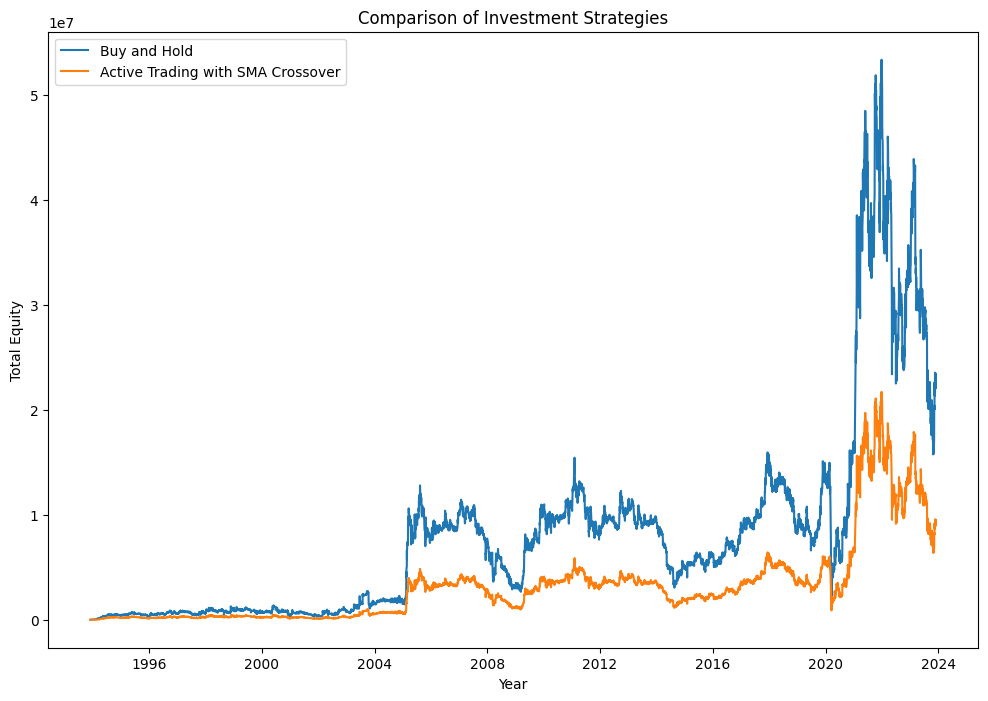

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['TotalEquity_BuyAndHold'], label='Buy and Hold')
plt.plot(df.index, df['TotalEquity_ActiveTrading'], label='Active Trading with SMA Crossover')
plt.title('Comparison of Investment Strategies')
plt.xlabel('Year')
plt.ylabel('Total Equity')
plt.legend()
plt.show()

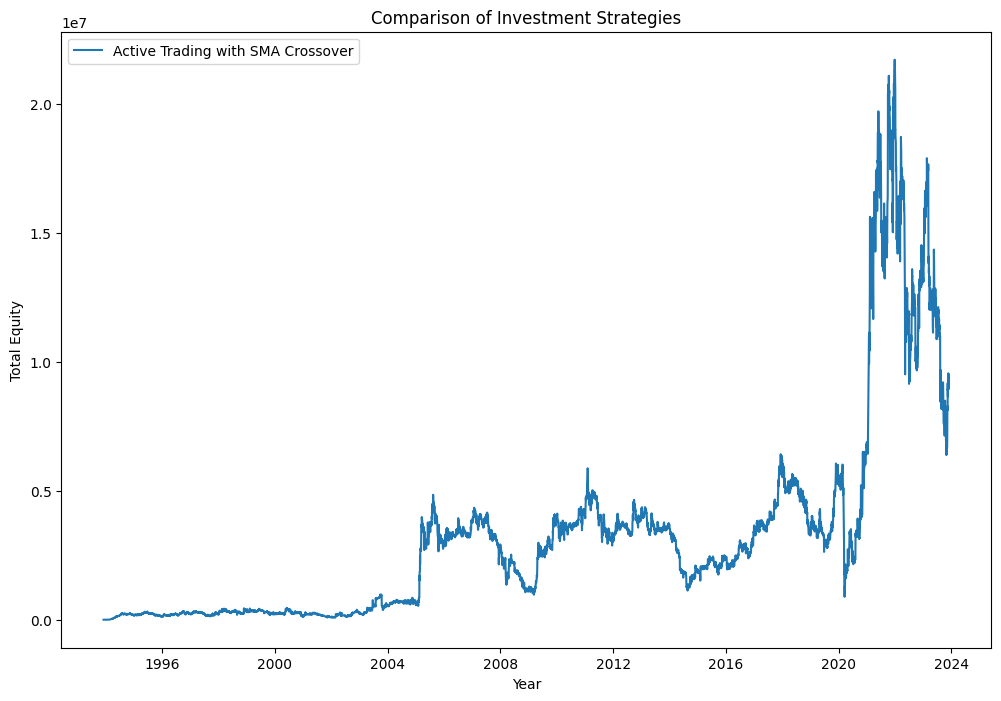

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['TotalEquity_ActiveTrading'], label='Active Trading with SMA Crossover')
plt.title('Comparison of Investment Strategies')
plt.xlabel('Year')
plt.ylabel('Total Equity')
plt.legend()
plt.show()

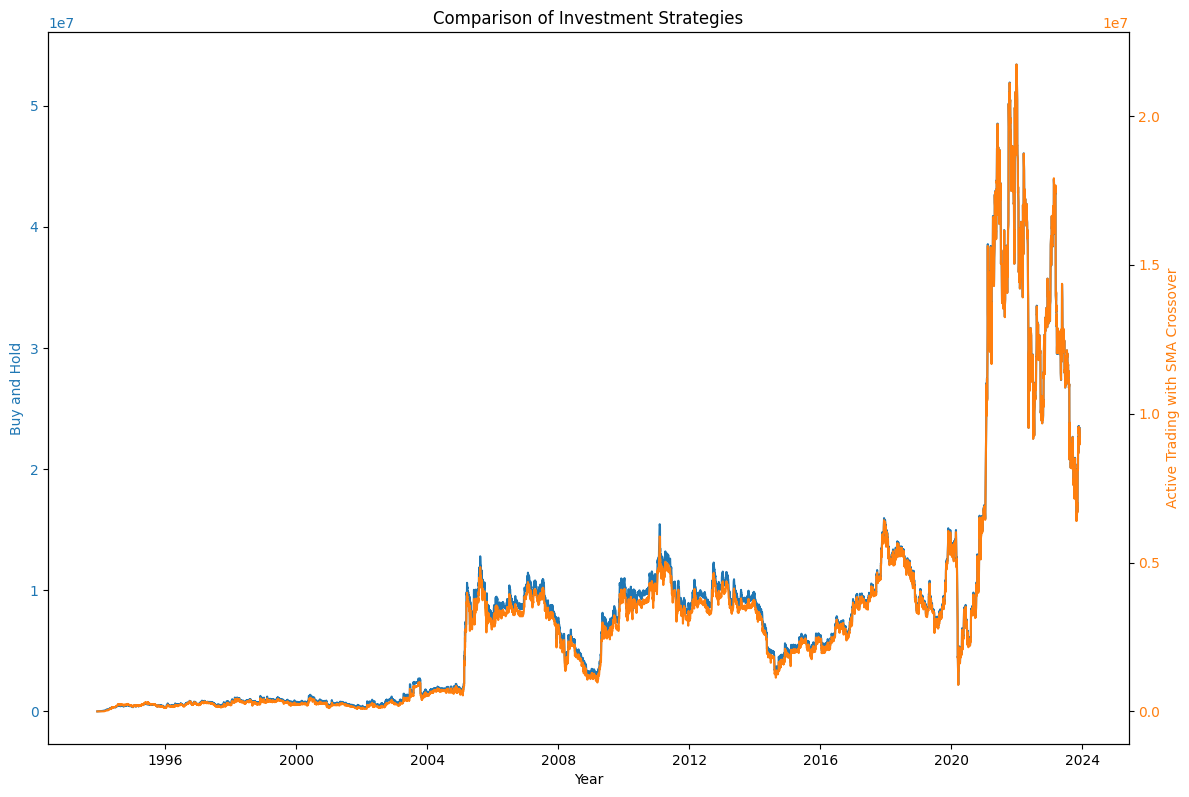

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Buy and Hold', color=color)
ax1.plot(df.index, df['TotalEquity_BuyAndHold'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Active Trading with SMA Crossover', color=color)
ax2.plot(df.index, df['TotalEquity_ActiveTrading'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Comparison of Investment Strategies')
plt.show()
